## 朴素贝叶斯分类 NaiveBayesClassification

一个简单的朴素贝叶斯分类的垃圾邮件识别python代码，定义垃圾邮件和正常邮件，然后使用先验概率计算当前几个用例是否垃圾邮件

A simple Python code for spam detection using Naive Bayes classification. Define spam and normal emails, then use prior probabilities to calculate whether several current examples are spam.

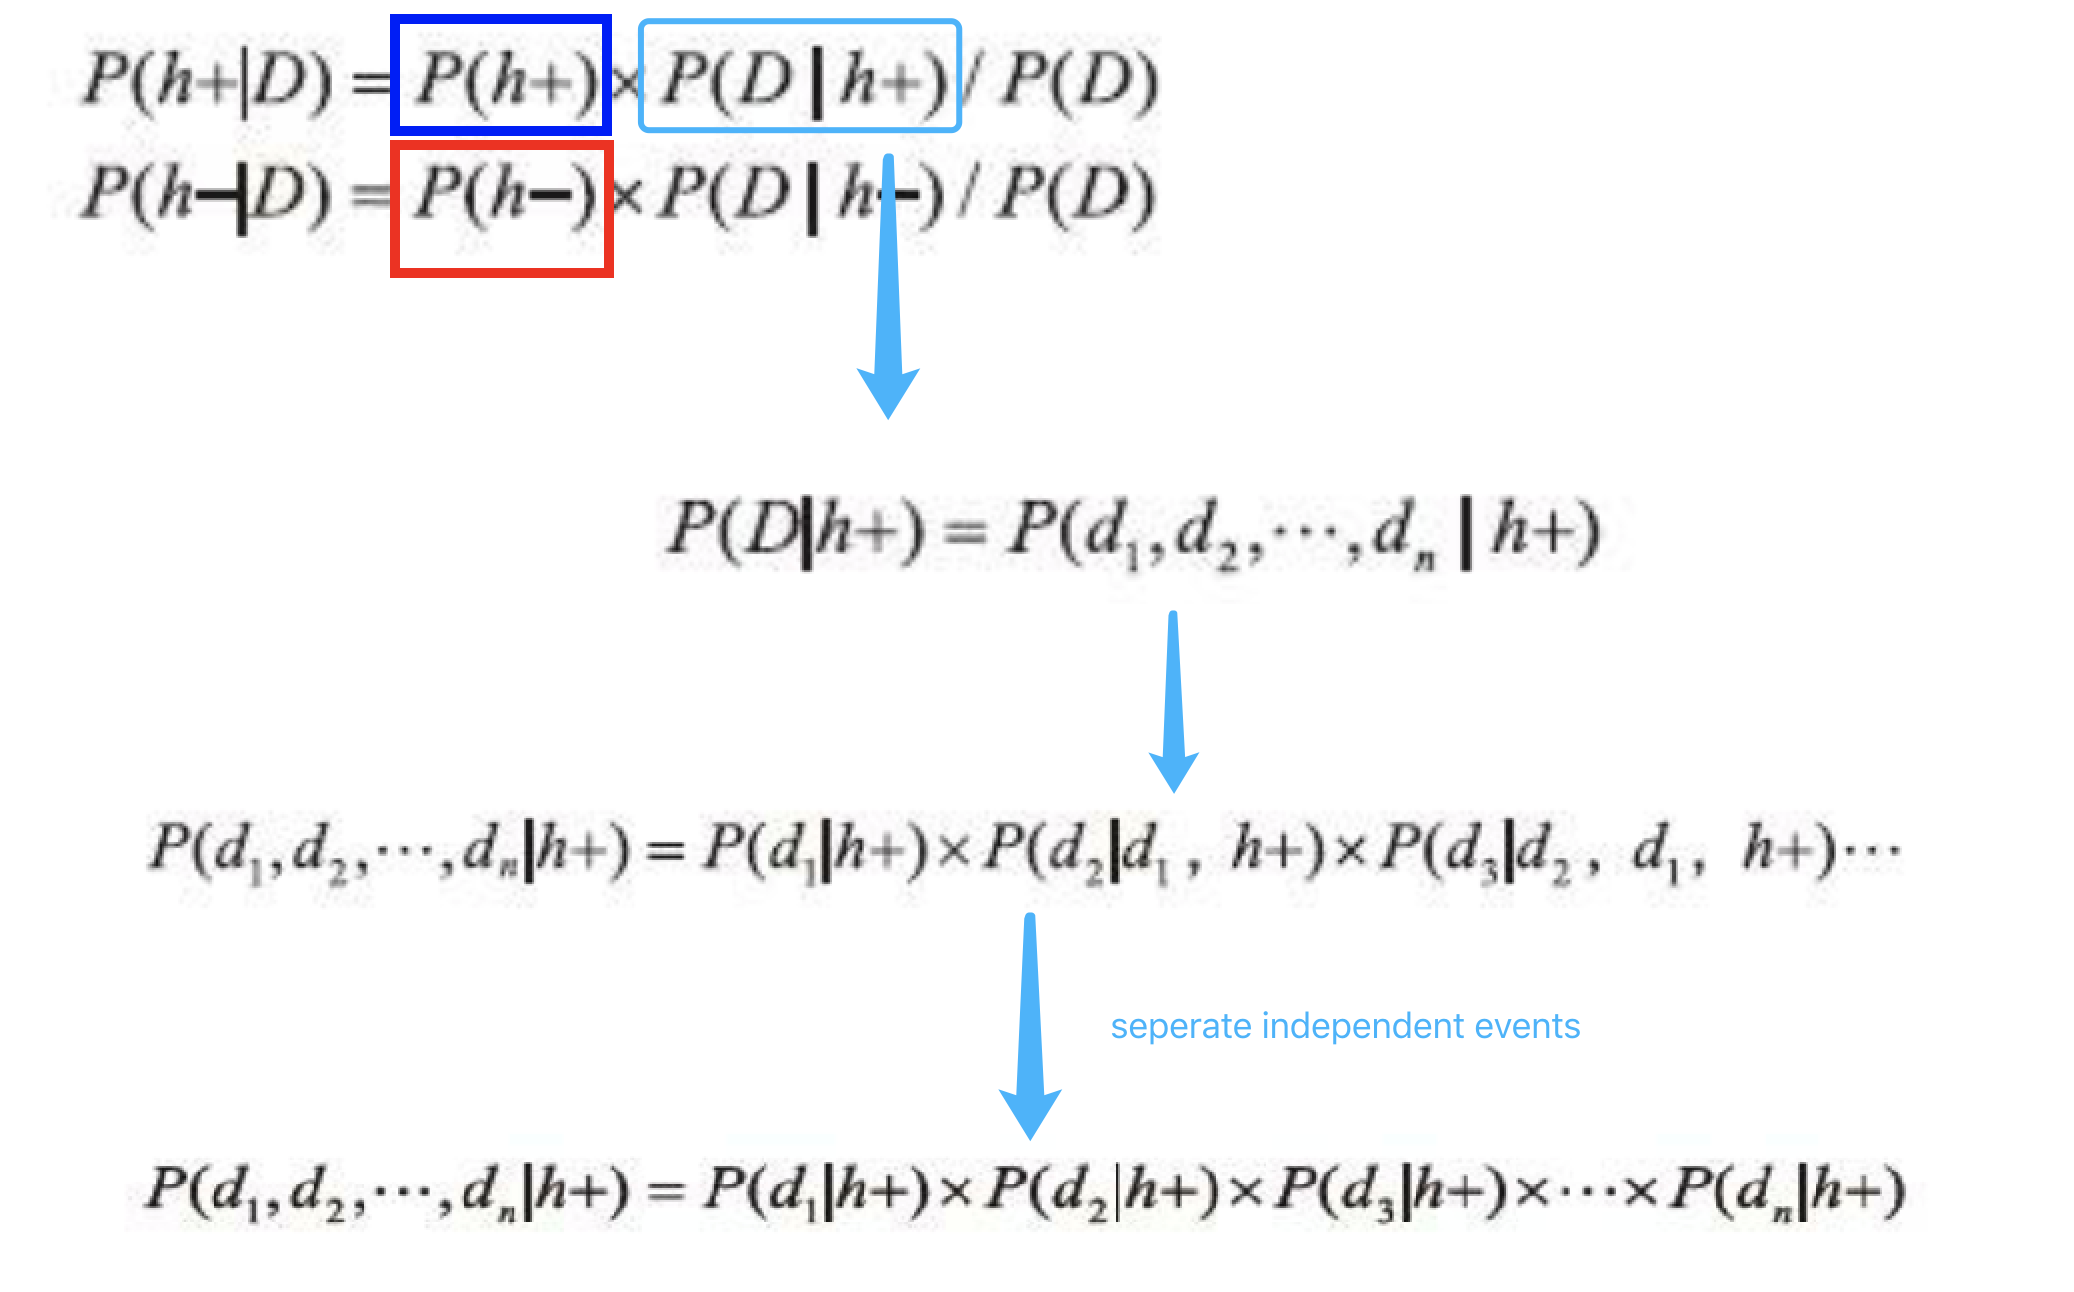

In [1]:
import re
from collections import defaultdict

# Helper function to tokenize and clean text
def tokenize(text):
    text = text.lower()
    return re.findall(r'\b\w+\b', text)

# Training data: some example spam and normal emails
spam_emails = [
    "Win money now",
    "Cheap loans available",
    "Click here to claim your prize",
    "You have won a lottery"
]

normal_emails = [
    "Meeting schedule",
    "Let's have lunch tomorrow",
    "Project deadline is next week",
    "Can we reschedule the call?"
]

# Step 1: Calculate the prior probabilities P(spam) and P(normal)
num_spam = len(spam_emails)
num_normal = len(normal_emails)
total_emails = num_spam + num_normal

P_spam = num_spam / total_emails
P_normal = num_normal / total_emails

# Step 2: Tokenize the emails and calculate the word frequencies for spam and normal emails
spam_word_counts = defaultdict(int)
normal_word_counts = defaultdict(int)

# Count word frequencies in spam emails
for email in spam_emails:
    words = tokenize(email)
    for word in words:
        spam_word_counts[word] += 1

# Count word frequencies in normal emails
for email in normal_emails:
    words = tokenize(email)
    for word in words:
        normal_word_counts[word] += 1

# Total number of words in spam and normal emails
total_spam_words = sum(spam_word_counts.values())
total_normal_words = sum(normal_word_counts.values())

# Step 3: Define a function to compute P(word | spam) and P(word | normal)
def word_prob(word, word_counts, total_words, alpha=1):
    # Use Laplace smoothing to handle unseen words
    return (word_counts[word] + alpha) / (total_words + alpha * 2)

# Step 4: Define the Naive Bayes classification function
def classify(email):
    words = tokenize(email)
    
    # Calculate the log probabilities to avoid underflow
    log_spam_prob = 0
    log_normal_prob = 0
    
    for word in words:
        # Calculate P(word | spam) and P(word | normal) with Laplace smoothing
        log_spam_prob += word_prob(word, spam_word_counts, total_spam_words)
        log_normal_prob += word_prob(word, normal_word_counts, total_normal_words)
    
    # Multiply by the prior probabilities P(spam) and P(normal)
    spam_score = P_spam * log_spam_prob
    normal_score = P_normal * log_normal_prob
    
    # Return the classification based on which score is higher
    if spam_score > normal_score:
        return "Spam"
    else:
        return "Not Spam"

# Step 5: Test the classifier with new emails
test_emails = [
    "Win a prize now",
    "Schedule a meeting",
    "Click here to win money",
    "Let's have lunch"
]

# Classify each test email
for email in test_emails:
    print(f"Email: '{email}' -> {classify(email)}")

Email: 'Win a prize now' -> Spam
Email: 'Schedule a meeting' -> Not Spam
Email: 'Click here to win money' -> Spam
Email: 'Let's have lunch' -> Not Spam
